![PHENIX](logoPHENIX.png)

## 4) Scientific python: numpy, scipy, matplotlib, pandas and sympy.  

In this part we'll focus on the uses of python as a tool for scientists.

**N.B.** The following content borrows heavily from lectures 2 -5 on scientific python. The original source, in its more detailed form can be found [here](https://github.com/jrjohansson/scientific-python-lectures).

## Numpy -  multidimensional data arrays

In [4]:
###### Let's import some useful packages
######################################################################
# what is this line all about?!? Answer in matplotlib section below  #
%matplotlib inline
######################################################################
import matplotlib.pyplot as plt

### Introduction
The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy` you need to import the module, using for example:

In [11]:
import numpy as np

 **N.B.** This is the author's preferred way of importing large packages such as numpy, you can also import as follows:  
     `from numpy import *`

### Creating numpy arrays
There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

#### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function, with `np.array` as a shortcut.

In [10]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])

v

array([1, 2, 3, 4])

In [12]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [13]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [14]:
v.shape

(4,)

In [15]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [16]:
M.size

4

Equivalently, we could use the function `numpy.shape` and `numpy.size`

In [18]:
np.shape(M)

(2, 2)

In [20]:
np.size(M)

4

So far the `numpy.ndarray` looks awefully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [21]:
M.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [22]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [24]:
M = np.array([[1, 2], [3, 4]], dtype=complex)

M

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

Common data types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

#### arange

In [25]:
# create a range

x = np.arange(0, 10, 1) # arguments: start, stop, step

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
x = np.arange(-1, 1, 0.1)

x

array([ -1.00000000e+00,  -9.00000000e-01,  -8.00000000e-01,
        -7.00000000e-01,  -6.00000000e-01,  -5.00000000e-01,
        -4.00000000e-01,  -3.00000000e-01,  -2.00000000e-01,
        -1.00000000e-01,  -2.22044605e-16,   1.00000000e-01,
         2.00000000e-01,   3.00000000e-01,   4.00000000e-01,
         5.00000000e-01,   6.00000000e-01,   7.00000000e-01,
         8.00000000e-01,   9.00000000e-01])

#### linspace and logspace

In [27]:
# using linspace, both end points ARE included
np.linspace(0, 10, 25)

array([  0.        ,   0.41666667,   0.83333333,   1.25      ,
         1.66666667,   2.08333333,   2.5       ,   2.91666667,
         3.33333333,   3.75      ,   4.16666667,   4.58333333,
         5.        ,   5.41666667,   5.83333333,   6.25      ,
         6.66666667,   7.08333333,   7.5       ,   7.91666667,
         8.33333333,   8.75      ,   9.16666667,   9.58333333,  10.        ])

In [29]:
np.logspace(0, 10, 10, base=np.e)

array([  1.00000000e+00,   3.03773178e+00,   9.22781435e+00,
         2.80316249e+01,   8.51525577e+01,   2.58670631e+02,
         7.85771994e+02,   2.38696456e+03,   7.25095809e+03,
         2.20264658e+04])

#### mgrid

In [30]:
x, y = np.mgrid[0:5, 0:5] # similar to meshgrid in MATLAB

In [31]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [32]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### random data

In [33]:
from numpy import random

In [34]:
# uniform random numbers in [0,1]
random.rand(5,5)

array([[  9.37612247e-02,   9.33493002e-01,   1.16630277e-01,
          7.14293816e-01,   9.51084460e-01],
       [  5.94665133e-01,   1.16066687e-04,   7.94676708e-01,
          5.20987199e-01,   6.47935005e-01],
       [  6.32976873e-01,   9.22224291e-01,   7.40231227e-01,
          2.29001784e-01,   1.52303278e-01],
       [  4.18772215e-01,   7.38426512e-01,   1.63231537e-01,
          5.84982048e-01,   5.54327089e-01],
       [  2.56713547e-01,   3.30416729e-01,   6.97520312e-01,
          6.82193726e-01,   2.08727981e-01]])

In [35]:
# standard normal distributed random numbers
random.randn(5,5)

array([[-1.66149157, -1.13318555,  0.69597188, -1.2078241 ,  0.69510714],
       [ 0.85010405, -1.53309209,  0.63805262,  0.16390595,  0.54349171],
       [ 1.35773889, -0.4351935 , -0.66307301, -0.11856821,  0.59498872],
       [ 0.83327215,  1.22609941, -0.37621699,  1.73218402, -0.03856624],
       [ 0.37349461,  1.07472958,  1.31542454,  1.15768316,  0.07699241]])

#### diag

In [36]:
# a diagonal matrix
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [37]:
# diagonal with offset from the main diagonal
np.diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### zeros and ones

In [40]:
np.zeros((3,3)) # an array of zeros of a given shape

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [41]:
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

## File I/O

### Comma-separated values (CSV)

A very common file format for data files is comma-separated values (CSV), or related formats such as TSV (tab-separated values). To read data from such files into Numpy arrays we can use the `numpy.genfromtxt` function. For example, 

In [43]:
!head stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [45]:
data = np.genfromtxt('stockholm_td_adj.dat')

In [46]:
data.shape

(77431, 7)

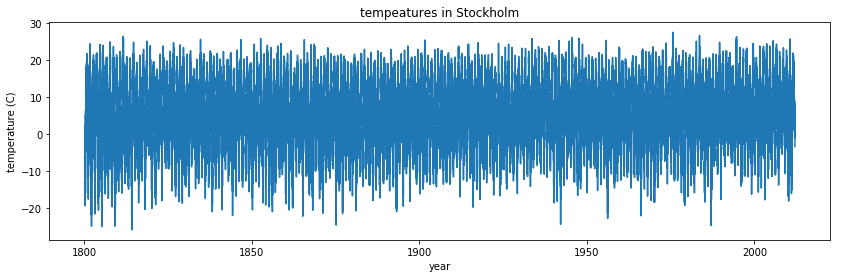

In [47]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');

Using `numpy.savetxt` we can store a Numpy array to a file in CSV format:

In [48]:
M = random.rand(3,3)

M

array([[ 0.13783529,  0.0695193 ,  0.23407343],
       [ 0.50168317,  0.8565431 ,  0.20512426],
       [ 0.50557122,  0.50053516,  0.41287401]])

In [49]:
np.savetxt("random-matrix.csv", M)

In [50]:
!cat random-matrix.csv

1.378352914846615596e-01 6.951929606070017531e-02 2.340734281252287996e-01
5.016831731251834015e-01 8.565431027559230470e-01 2.051242582500384382e-01
5.055712242205505635e-01 5.005351617934222785e-01 4.128740142678263281e-01


In [51]:
np.savetxt("random-matrix.csv", M, fmt='%.5f') # fmt specifies the format

!cat random-matrix.csv

0.13784 0.06952 0.23407
0.50168 0.85654 0.20512
0.50557 0.50054 0.41287


## More properties of the numpy arrays

In [54]:
M.itemsize # bytes per element

8

In [55]:
M.nbytes # number of bytes

72

In [56]:
M.ndim # number of dimensions

2

## Manipulating arrays

### Indexing

We can index elements in an array using square brackets and indices:

In [57]:
# v is a vector, and has only one dimension, taking one index
v[0]

1

In [58]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

0.85654310275592305

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [59]:
M

array([[ 0.13783529,  0.0695193 ,  0.23407343],
       [ 0.50168317,  0.8565431 ,  0.20512426],
       [ 0.50557122,  0.50053516,  0.41287401]])

In [60]:
M[1]

array([ 0.50168317,  0.8565431 ,  0.20512426])

The same thing can be achieved with using `:` instead of an index: 

In [61]:
M[1,:] # row 1

array([ 0.50168317,  0.8565431 ,  0.20512426])

In [62]:
M[:,1] # column 1

array([ 0.0695193 ,  0.8565431 ,  0.50053516])

We can assign new values to elements in an array using indexing:

In [63]:
M[0,0] = 1

In [64]:
M

array([[ 1.        ,  0.0695193 ,  0.23407343],
       [ 0.50168317,  0.8565431 ,  0.20512426],
       [ 0.50557122,  0.50053516,  0.41287401]])

In [65]:
# also works for rows and columns
M[1,:] = 0
M[:,2] = -1

In [66]:
M

array([[ 1.        ,  0.0695193 , -1.        ],
       [ 0.        ,  0.        , -1.        ],
       [ 0.50557122,  0.50053516, -1.        ]])

### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [68]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [69]:
A[1:3]

array([2, 3])

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [70]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[lower:upper:step]`:

In [71]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [72]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [73]:
A[:3] # first three elements

array([ 1, -2, -3])

In [74]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [76]:
A = np.array([1,2,3,4,5])

In [77]:
A[-1] # the last element in the array

5

In [78]:
A[-3:] # the last three elements

array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:

In [81]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)]) # Example of a list comprehension.

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [82]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [83]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Fancy indexing

Fancy indexing is the name for when an array or list is used in-place of an index: 

In [84]:
row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [85]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

array([11, 22, 34])

We can also use index masks: If the index mask is an Numpy array of data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position of each element: 

In [87]:
B = np.array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [89]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [91]:
# same thing
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [92]:
x = np.arange(0, 10, 0.5)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [93]:
mask = (5 < x) * (x < 7.5)

mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False], dtype=bool)

In [94]:
x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

## Functions for extracting data from arrays and creating arrays

### where

The index mask can be converted to position index using the `where` function

In [96]:
indices = np.where(mask)

indices

(array([11, 12, 13, 14]),)

In [97]:
x[indices] # this indexing is equivalent to the fancy indexing x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

### diag

With the diag function we can also extract the diagonal and subdiagonals of an array:

In [99]:
np.diag(A)

array([ 0, 11, 22, 33, 44])

In [100]:
np.diag(A, -1)

array([10, 21, 32, 43])

### take

The `take` function is similar to fancy indexing described above:

In [101]:
v2 = np.arange(-3,3)
v2

array([-3, -2, -1,  0,  1,  2])

In [102]:
row_indices = [1, 3, 5]
v2[row_indices] # fancy indexing

array([-2,  0,  2])

In [103]:
v2.take(row_indices)

array([-2,  0,  2])

But `take` also works on lists and other objects:

In [105]:
np.take([-3, -2, -1,  0,  1,  2], row_indices)

array([-2,  0,  2])

### choose

Constructs an array by picking elements from several arrays:

In [106]:
which = [1, 0, 1, 0]
choices = [[-2,-2,-2,-2], [5,5,5,5]]

np.choose(which, choices)

array([ 5, -2,  5, -2])

## Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [107]:
v1 = np.arange(0, 5)

In [108]:
v1 * 2

array([0, 2, 4, 6, 8])

In [109]:
v1 + 2

array([2, 3, 4, 5, 6])

In [110]:
A * 2, A + 2

(array([[ 0,  2,  4,  6,  8],
        [20, 22, 24, 26, 28],
        [40, 42, 44, 46, 48],
        [60, 62, 64, 66, 68],
        [80, 82, 84, 86, 88]]), array([[ 2,  3,  4,  5,  6],
        [12, 13, 14, 15, 16],
        [22, 23, 24, 25, 26],
        [32, 33, 34, 35, 36],
        [42, 43, 44, 45, 46]]))

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [111]:
A * A # element-wise multiplication

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [112]:
v1 * v1

array([ 0,  1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [113]:
A.shape, v1.shape

((5, 5), (5,))

In [114]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [115]:
np.dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [116]:
np.dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [117]:
np.dot(v1, v1)

30

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra.

In [119]:
M = np.matrix(A)
v = np.matrix(v1).T # make it a column vector

In [120]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [121]:
M * M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [122]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [123]:
# inner product
v.T * v

matrix([[30]])

In [124]:
# with matrix objects, standard matrix algebra applies
v + M*v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

If we try to add, subtract or multiply objects with incomplatible shapes we get an error:

In [125]:
v = np.matrix([1,2,3,4,5,6]).T

In [126]:
np.shape(M), np.shape(v)

((5, 5), (6, 1))

In [127]:
M * v

ValueError: shapes (5,5) and (6,1) not aligned: 5 (dim 1) != 6 (dim 0)

See also the related functions: `inner`, `outer`, `cross`, `kron`, `tensordot`. Try for example `help(kron)`.

### Array/Matrix transformations

Above we have used the `.T` to transpose the matrix object `v`. We could also have used the `transpose` function to accomplish the same thing. 

Other mathematical functions that transform matrix objects are:

In [128]:
C = np.matrix([[1j, 2j], [3j, 4j]])
C

matrix([[ 0.+1.j,  0.+2.j],
        [ 0.+3.j,  0.+4.j]])

In [129]:
np.conjugate(C)

matrix([[ 0.-1.j,  0.-2.j],
        [ 0.-3.j,  0.-4.j]])

Hermitian conjugate: transpose + conjugate

In [130]:
C.H

matrix([[ 0.-1.j,  0.-3.j],
        [ 0.-2.j,  0.-4.j]])

We can extract the real and imaginary parts of complex-valued arrays using `real` and `imag`:

In [132]:
np.real(C) # same as: C.real

matrix([[ 0.,  0.],
        [ 0.,  0.]])

In [133]:
np.imag(C) # same as: C.imag

matrix([[ 1.,  2.],
        [ 3.,  4.]])

Or the complex argument and absolute value

In [134]:
np.angle(C+1) # heads up MATLAB Users, angle is used instead of arg

array([[ 0.78539816,  1.10714872],
       [ 1.24904577,  1.32581766]])

In [135]:
abs(C)

matrix([[ 1.,  2.],
        [ 3.,  4.]])

### Matrix computations

#### Inverse

In [137]:
np.linalg.inv(C) # equivalent to C.I 

matrix([[ 0.+2.j ,  0.-1.j ],
        [ 0.-1.5j,  0.+0.5j]])

In [138]:
C.I * C

matrix([[  1.00000000e+00+0.j,   0.00000000e+00+0.j],
        [  1.11022302e-16+0.j,   1.00000000e+00+0.j]])

#### Determinant

In [139]:
np.linalg.det(C)

(2.0000000000000004+0j)

In [140]:
np.linalg.det(C.I)

(0.49999999999999967+0j)

### Data processing

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays. 

For example, let's calculate some properties from the Stockholm temperature dataset used above.

In [141]:
# reminder, the tempeature dataset is stored in the data variable:
np.shape(data)

(77431, 7)

#### mean

In [142]:
# the temperature data is in column 3
np.mean(data[:,3])

6.1971096847515854

The daily mean temperature in Stockholm over the last 200 years has been about 6.2 C.

#### standard deviations and variance

In [143]:
np.std(data[:,3]), np.var(data[:,3])

(8.2822716213405734, 68.596023209663414)

#### min and max

In [144]:
# lowest daily average temperature
data[:,3].min()

-25.800000000000001

In [145]:
# highest daily average temperature
data[:,3].max()

28.300000000000001

#### sum, prod, and trace

In [146]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [149]:
# sum up all elements
np.sum(d)

45

In [150]:
# product of all elements
np.prod(d+1)

3628800

In [151]:
# cummulative sum
np.cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [152]:
# cummulative product
np.cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [153]:
# same as: diag(A).sum()
np.trace(A)

110

### Computations on subsets of arrays

We can compute with subsets of the data in an array using indexing, fancy indexing, and the other methods of extracting data from an array (described above).

For example, let's go back to the temperature dataset:

In [154]:
!head -n 3 stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1


The dataformat is: year, month, day, daily average temperature, low, high, location.

If we are interested in the average temperature only in a particular month, say February, then we can create a index mask and use it to select only the data for that month using:

In [155]:
np.unique(data[:,1]) # the month column takes values from 1 to 12

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

In [156]:
mask_feb = data[:,1] == 2

In [157]:
# the temperature data is in column 3
np.mean(data[mask_feb,3])

-3.2121095707365961

With these tools we have very powerful data processing capabilities at our disposal. For example, to extract the average monthly average temperatures for each month of the year only takes a few lines of code: 

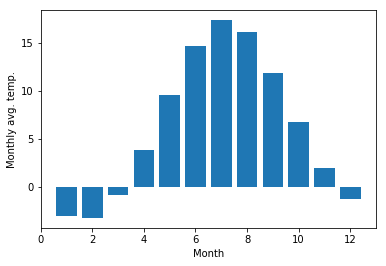

In [158]:
months = np.arange(1,13)
monthly_mean = [np.mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### Calculations with higher-dimensional data

When functions such as `min`, `max`, etc. are applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave: 

In [159]:
m = random.rand(3,3)
m

array([[ 0.90533414,  0.84285184,  0.78047177],
       [ 0.70489361,  0.74894951,  0.32455539],
       [ 0.23634779,  0.02069297,  0.72707788]])

In [160]:
# global max
m.max()

0.90533414322755568

In [161]:
# max in each column
m.max(axis=0)

array([ 0.90533414,  0.84285184,  0.78047177])

In [162]:
# max in each row
m.max(axis=1)

array([ 0.90533414,  0.74894951,  0.72707788])

Many other functions and methods in the `array` and `matrix` classes accept the same (optional) `axis` keyword argument.

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [163]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [164]:
n, m = A.shape

In [165]:
B = A.reshape((1,n*m))
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
        32, 33, 34, 40, 41, 42, 43, 44]])

In [166]:
B[0,0:5] = 5 # modify the array

B

array([[ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
        32, 33, 34, 40, 41, 42, 43, 44]])

In [167]:
A # and the original variable is also changed. B is only a different view of the same data

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a copy of the data.

In [168]:
B = A.flatten()

B

array([ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [169]:
B[0:5] = 10

B

array([10, 10, 10, 10, 10, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [170]:
A # now A has not changed, because B's data is a copy of A's, not refering to the same data

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

## Adding a new dimension: newaxis

With `newaxis`, we can insert new dimensions in an array, for example converting a vector to a column or row matrix:

In [171]:
v = np.array([1,2,3])

In [172]:
np.shape(v)

(3,)

In [174]:
# make a column matrix of the vector v
v[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [176]:
# column matrix
v[:,np.newaxis].shape

(3, 1)

In [177]:
# row matrix
v[np.newaxis,:].shape

(1, 3)

## Stacking and repeating arrays

Using function `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones:

### tile and repeat

In [178]:
a = np.array([[1, 2], [3, 4]])

In [179]:
# repeat each element 3 times
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [180]:
# tile the matrix 3 times 
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

### concatenate

In [181]:
b = np.array([[5, 6]])

In [182]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [183]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### hstack and vstack

In [184]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [185]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Copy and "deep copy"

To achieve high performance, assignments in Python usually do not copy the underlaying objects. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (technical term: pass by reference). 

In [186]:
A = np.array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [187]:
# now B is referring to the same array data as A 
B = A 

In [188]:
# changing B affects A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [189]:
A

array([[10,  2],
       [ 3,  4]])

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called "deep copy" using the function `copy`:

In [191]:
B = np.copy(A)

In [192]:
# now, if we modify B, A is not affected
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [193]:
A

array([[10,  2],
       [ 3,  4]])

## Iterating over array elements

Generally, we want to avoid iterating over the elements of arrays whenever we can (at all costs). The reason is that in a interpreted language like Python (or MATLAB), iterations are really slow compared to vectorized operations. 

However, sometimes iterations are unavoidable. For such cases, the Python `for` loop is the most convenient way to iterate over an array:

In [194]:
v = np.array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [195]:
M = np.array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


When we need to iterate over each element of an array and modify its elements, it is convenient to use the `enumerate` function to obtain both the element and its index in the `for` loop: 

In [196]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [197]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

## Vectorizing functions

As mentioned several times by now, to get good performance we should try to avoid looping over elements in our vectors and matrices, and instead use vectorized algorithms. The first step in converting a scalar algorithm to a vectorized algorithm is to make sure that the functions we write work with vector inputs.

In [198]:
def Theta(x):
    """
    Scalar implemenation of the Heaviside step function.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [199]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

OK, that didn't work because we didn't write the `Theta` function so that it can handle a vector input... 

To get a vectorized version of Theta we can use the Numpy function `vectorize`. In many cases it can automatically vectorize a function:

In [201]:
Theta_vec = np.vectorize(Theta)

In [203]:
Theta_vec(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

We can also implement the function to accept a vector input from the beginning (requires more effort but might give better performance):

In [204]:
def Theta(x):
    """
    Vector-aware implemenation of the Heaviside step function.
    """
    return 1 * (x >= 0)

In [205]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [206]:
# still works for scalars as well
Theta(-1.2), Theta(2.6)

(0, 1)

## Using arrays in conditions

When using arrays in conditions,for example `if` statements and other boolean expressions, one needs to use `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [207]:
M

array([[ 1,  4],
       [ 9, 16]])

In [208]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

at least one element in M is larger than 5


In [209]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## Type casting

Since Numpy arrays are *statically typed*, the type of an array does not change once created. But we can explicitly cast an array of some type to another using the `astype` functions (see also the similar `asarray` function). This always create a new array of new type:

In [210]:
M.dtype

dtype('int64')

In [211]:
M2 = M.astype(float)

M2

array([[  1.,   4.],
       [  9.,  16.]])

In [212]:
M2.dtype

dtype('float64')

In [213]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]], dtype=bool)

## SciPy - Library of scientific algorithms for Python

In [214]:
from IPython.display import Image

## Introduction

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.

To access the SciPy package in a Python program, we start by importing everything from the `scipy` module.

In [2]:
from scipy import *

If we only need to use part of the SciPy framework we can selectively include only those modules we are interested in. For example, to include the linear algebra package under the name `la`, we can do:

In [3]:
import scipy.linalg as la

## Special functions

A large number of mathematical special functions are important for many computional physics problems. SciPy provides implementations of a very extensive set of special functions. For details, see the list of functions in the reference documention at http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

To demonstrate the typical usage of special functions we will look in more detail at the Bessel functions:

In [4]:
#
# The scipy.special module includes a large number of Bessel-functions
# Here we will use the functions jn and yn, which are the Bessel functions 
# of the first and second kind and real-valued order. We also include the 
# function jn_zeros and yn_zeros that gives the zeroes of the functions jn
# and yn.
#
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [5]:
n = 0    # order
x = 0.0

# Bessel function of first kind
print "J_%d(%f) = %f" % (n, x, jn(n, x))

x = 1.0
# Bessel function of second kind
print "Y_%d(%f) = %f" % (n, x, yn(n, x))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


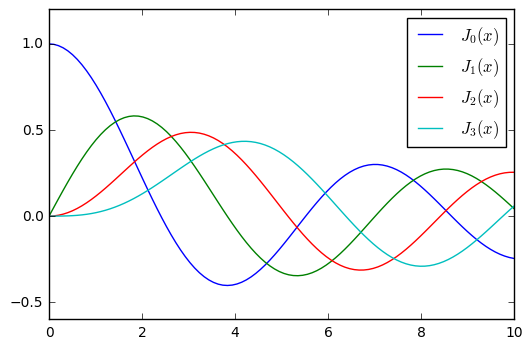

In [6]:
x = linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();

In [7]:
# zeros of Bessel functions
n = 0 # order
m = 4 # number of roots to compute
jn_zeros(n, m)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444])

## Integration

### Numerical integration: quadrature

Numerical evaluation of a function of the type

$\displaystyle \int_a^b f(x) dx$

is called *numerical quadrature*, or simply *quadature*. SciPy provides a series of functions for different kind of quadrature, for example the `quad`, `dblquad` and `tplquad` for single, double and triple integrals, respectively.



In [8]:
from scipy.integrate import quad, dblquad, tplquad

The `quad` function takes a large number of optional arguments, which can be used to fine-tune the behaviour of the function (try `help(quad)` for details).

The basic usage is as follows:

In [9]:
# define a simple function for the integrand
def f(x):
    return x

In [10]:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = quad(f, x_lower, x_upper)

print "integral value =", val, ", absolute error =", abserr 

integral value = 0.5 , absolute error = 5.55111512313e-15


If we need to pass extra arguments to integrand function we can use the `args` keyword argument:

In [11]:
def integrand(x, n):
    """
    Bessel function of first kind and order n. 
    """
    return jn(n, x)


x_lower = 0  # the lower limit of x
x_upper = 10 # the upper limit of x

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))

print val, abserr 

0.736675137081 9.3891268825e-13


For simple functions we can use a lambda function (name-less function) instead of explicitly defining a function for the integrand:

In [12]:
val, abserr = quad(lambda x: exp(-x ** 2), -Inf, Inf)

print "numerical  =", val, abserr

analytical = sqrt(pi)
print "analytical =", analytical

numerical  = 1.77245385091 1.42026367809e-08
analytical = 1.77245385091


As show in the example above, we can also use 'Inf' or '-Inf' as integral limits.

Higher-dimensional integration works in the same way:

In [13]:
def integrand(x, y):
    return exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print val, abserr 

0.785398163397 1.63822994214e-13


Note how we had to pass lambda functions for the limits for the y integration, since these in general can be functions of x.

## Ordinary differential equations (ODEs)

SciPy provides two different ways to solve ODEs: An API based on the function `odeint`, and object-oriented API based on the class `ode`. Usually `odeint` is easier to get started with, but the `ode` class offers some finer level of control.

Here we will use the `odeint` functions. For more information about the class `ode`, try `help(ode)`. It does pretty much the same thing as `odeint`, but in an object-oriented fashion.

To use `odeint`, first import it from the `scipy.integrate` module

In [14]:
from scipy.integrate import odeint, ode

A system of ODEs are usually formulated on standard form before it is attacked numerically. The standard form is:

$y' = f(y, t)$

where 

$y = [y_1(t), y_2(t), ..., y_n(t)]$ 

and $f$ is some function that gives the derivatives of the function $y_i(t)$. To solve an ODE we need to know the function $f$ and an initial condition, $y(0)$.

Note that higher-order ODEs can always be written in this form by introducing new variables for the intermediate derivatives.

Once we have defined the Python function `f` and array `y_0` (that is $f$ and $y(0)$ in the mathematical formulation), we can use the `odeint` function as:

    y_t = odeint(f, y_0, t)

where `t` is and array with time-coordinates for which to solve the ODE problem. `y_t` is an array with one row for each point in time in `t`, where each column corresponds to a solution `y_i(t)` at that point in time. 

We will see how we can implement `f` and `y_0` in Python code in the examples below.

#### Example: double pendulum

Let's consider a physical example: The double compound pendulum, described in some detail here: http://en.wikipedia.org/wiki/Double_pendulum

In [15]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

The equations of motion of the pendulum are given on the wiki page:

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

To make the Python code simpler to follow, let's introduce new variable names and the vector notation: $x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

${\dot x_1} = \frac{6}{m\ell^2} \frac{ 2 x_3 - 3 \cos(x_1-x_2) x_4}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_2} = \frac{6}{m\ell^2} \frac{ 8 x_4 - 3 \cos(x_1-x_2) x_3}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_3} = -\frac{1}{2} m \ell^2 \left [ {\dot x_1} {\dot x_2} \sin (x_1-x_2) + 3 \frac{g}{\ell} \sin x_1 \right ]$

${\dot x_4} = -\frac{1}{2} m \ell^2 \left [ -{\dot x_1} {\dot x_2} \sin (x_1-x_2) +  \frac{g}{\ell} \sin x_2 \right]$

In [16]:
g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """
    The right-hand side of the pendulum ODE
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    
    return [dx1, dx2, dx3, dx4]

In [17]:
# choose an initial state
x0 = [pi/4, pi/2, 0, 0]

In [18]:
# time coodinate to solve the ODE for: from 0 to 10 seconds
t = linspace(0, 10, 250)

In [19]:
# solve the ODE problem
x = odeint(dx, x0, t)

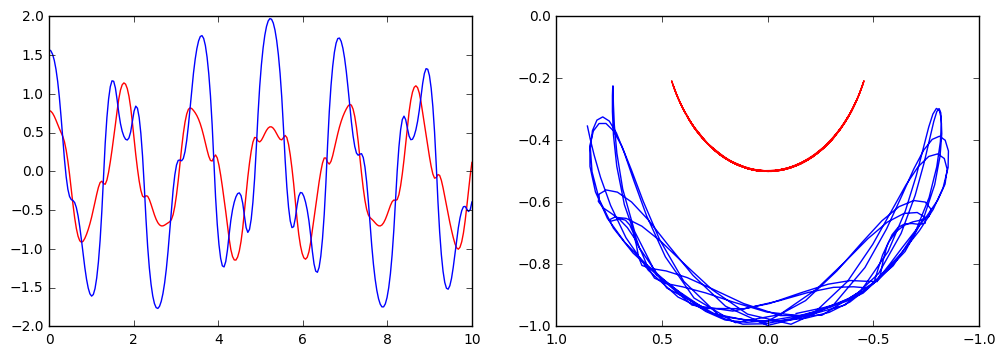

In [20]:
# plot the angles as a function of time

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")


x1 = + L * sin(x[:, 0])
y1 = - L * cos(x[:, 0])

x2 = x1 + L * sin(x[:, 1])
y2 = y1 - L * cos(x[:, 1])
    
axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

Simple annimation of the pendulum motion. We will see how to make better animation in Lecture 4.

In [21]:
from IPython.display import display, clear_output
import time

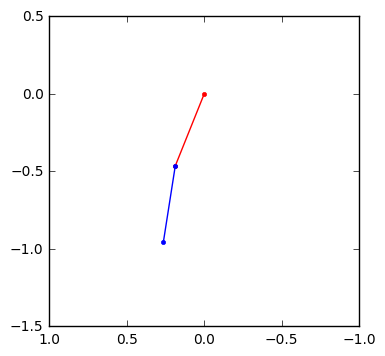

KeyboardInterrupt: 

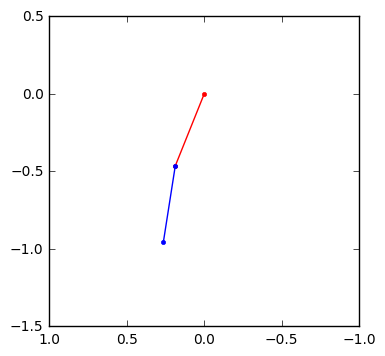

In [25]:
fig, ax = plt.subplots(figsize=(4,4))

for t_idx, tt in enumerate(t[:200]):

    x1 = + L * sin(x[t_idx, 0])
    y1 = - L * cos(x[t_idx, 0])

    x2 = x1 + L * sin(x[t_idx, 1])
    y2 = y1 - L * cos(x[t_idx, 1])
    
    ax.cla()    
    ax.plot([0, x1], [0, y1], 'r.-')
    ax.plot([x1, x2], [y1, y2], 'b.-')
    ax.set_ylim([-1.5, 0.5])
    ax.set_xlim([1, -1])

    clear_output() 
    display(fig)

    time.sleep(0.5)

#### Example: Damped harmonic oscillator

ODE problems are important in computational physics, so we will look at one more example: the damped harmonic oscillation. This problem is well described on the wiki page: http://en.wikipedia.org/wiki/Damping

The equation of motion for the damped oscillator is:

$\displaystyle \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega^2_0 x = 0$

where $x$ is the position of the oscillator, $\omega_0$ is the frequency, and $\zeta$ is the damping ratio. To write this second-order ODE on standard form we introduce $p = \frac{\mathrm{d}x}{\mathrm{d}t}$:

$\displaystyle \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x$

$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}t} = p$

In the implementation of this example we will add extra arguments to the RHS function for the ODE, rather than using global variables as we did in the previous example. As a consequence of the extra arguments to the RHS, we need to pass an keyword argument `args` to the `odeint` function:

In [26]:
def dy(y, t, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [27]:
# initial state: 
y0 = [1.0, 0.0]

In [28]:
# time coodinate to solve the ODE for
t = linspace(0, 10, 1000)
w0 = 2*pi*1.0

In [29]:
# solve the ODE problem for three different values of the damping ratio

y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

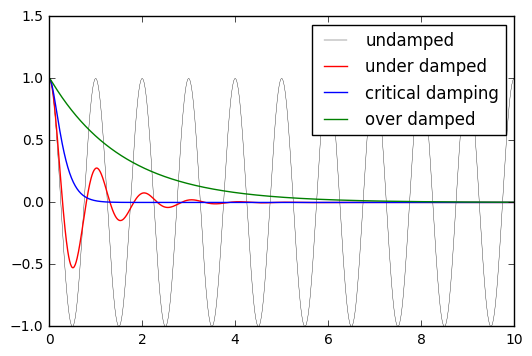

In [30]:
fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend();

## Fourier transform

Fourier transforms are one of the universal tools in computational physics, which appear over and over again in different contexts. SciPy provides functions for accessing the classic [FFTPACK](http://www.netlib.org/fftpack/) library from NetLib, which is an efficient and well tested FFT library written in FORTRAN. The SciPy API has a few additional convenience functions, but overall the API is closely related to the original FORTRAN library.

To use the `fftpack` module in a python program, include it using:

In [31]:
from numpy.fft import fftfreq
from scipy.fftpack import *

To demonstrate how to do a fast Fourier transform with SciPy, let's look at the FFT of the solution to the damped oscillator from the previous section:

In [32]:
N = len(t)
dt = t[1]-t[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(y2[:,0]) 

# calculate the frequencies for the components in F
w = fftfreq(N, dt)

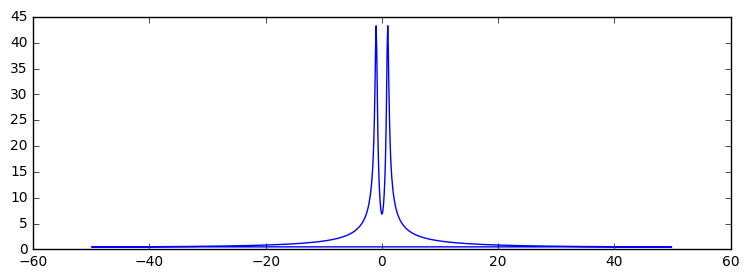

In [33]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w, abs(F));

Since the signal is real, the spectrum is symmetric. We therefore only need to plot the part that corresponds to the postive frequencies. To extract that part of the `w` and `F` we can use some of the indexing tricks for NumPy arrays that we saw in Lecture 2:

In [34]:
indices = where(w > 0) # select only indices for elements that corresponds to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

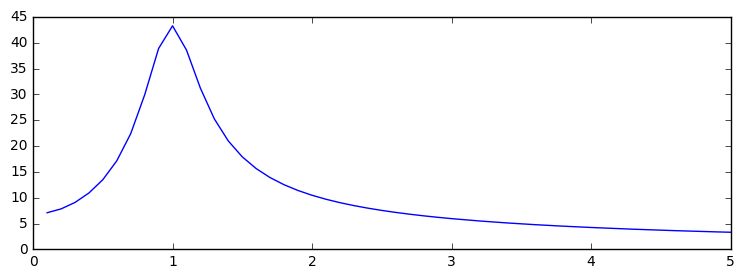

In [35]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 5);

As expected, we now see a peak in the spectrum that is centered around 1, which is the frequency we used in the damped oscillator example.

## Linear algebra

The linear algebra module contains a lot of matrix related functions, including linear equation solving, eigenvalue solvers, matrix functions (for example matrix-exponentiation), a number of different decompositions (SVD, LU, cholesky), etc. 

Detailed documetation is available at: http://docs.scipy.org/doc/scipy/reference/linalg.html

Here we will look at how to use some of these functions:



### Linear equation systems

Linear equation systems on the matrix form

$A x = b$

where $A$ is a matrix and $x,b$ are vectors can be solved like:

In [36]:
from scipy.linalg import *

In [78]:
A = arange(1,10, dtype=float64)

In [81]:
A = A.reshape(3,3)

In [87]:
det(A)

0.0

In [88]:
A = array([[1,2,3], [4,5,6], [7,8,9]])

det(A)

0.0

In [85]:
b = arange(1,4, dtype=float64)

In [83]:
# A = array([[1,2,3], [4,5,6], [7,8,9]])
# b = array([1,2,3])

In [70]:
my_x = array([-0.33333333,  0.66666667,  0.        ])

In [71]:
dot(A,my_x)

array([ 1.00000001,  2.00000003,  3.00000005])

In [86]:
x = solve(A, b)

x

LinAlgError: singular matrix

In [65]:
# check
dot(A, x) - b

array([  0.00000000e+00,  -2.22044605e-16,   0.00000000e+00])

We can also do the same with

$A X = B$

where $A, B, X$ are matrices:

In [42]:
A = rand(3,3)
B = rand(3,3)

In [43]:
X = solve(A, B)

In [44]:
X

array([[-0.17459177,  3.13889904,  2.01223921],
       [-0.10842363,  0.51403064,  0.14817778],
       [ 2.66168564, -5.33921143, -2.98572099]])

In [45]:
# check
norm(dot(A, X) - B)

3.9055556787155022e-16

### Eigenvalues and eigenvectors

The eigenvalue problem for a matrix $A$:

$\displaystyle A v_n = \lambda_n v_n$

where $v_n$ is the $n$th eigenvector and $\lambda_n$ is the $n$th eigenvalue.

To calculate eigenvalues of a matrix, use the `eigvals` and for calculating both eigenvalues and eigenvectors, use the function `eig`:

In [ ]:
evals = eigvals(A)

In [ ]:
evals

In [ ]:
evals, evecs = eig(A)

In [ ]:
evals

In [ ]:
evecs

The eigenvectors corresponding to the $n$th eigenvalue (stored in `evals[n]`) is the $n$th *column* in `evecs`, i.e., `evecs[:,n]`. To verify this, let's try mutiplying eigenvectors with the matrix and compare to the product of the eigenvector and the eigenvalue:

In [ ]:
n = 1

norm(dot(A, evecs[:,n]) - evals[n] * evecs[:,n])

There are also more specialized eigensolvers, like the `eigh` for Hermitian matrices. 

### Matrix operations

In [ ]:
# the matrix inverse
inv(A)

In [ ]:
# determinant
det(A)

In [ ]:
# norms of various orders
norm(A, ord=2), norm(A, ord=Inf)

### Sparse matrices

Sparse matrices are often useful in numerical simulations dealing with large systems, if the problem can be described in matrix form where the matrices or vectors mostly contains zeros. Scipy has a good support for sparse matrices, with basic linear algebra operations (such as equation solving, eigenvalue calculations, etc).

There are many possible strategies for storing sparse matrices in an efficient way. Some of the most common are the so-called coordinate form (COO), list of list (LIL) form,  and compressed-sparse column CSC (and row, CSR). Each format has some advantanges and disadvantages. Most computational algorithms (equation solving, matrix-matrix multiplication, etc) can be efficiently implemented using CSR or CSC formats, but they are not so intuitive and not so easy to initialize. So often a sparse matrix is initially created in COO or LIL format (where we can efficiently add elements to the sparse matrix data), and then converted to CSC or CSR before used in real calcalations.

For more information about these sparse formats, see e.g. http://en.wikipedia.org/wiki/Sparse_matrix

When we create a sparse matrix we have to choose which format it should be stored in. For example, 

In [ ]:
from scipy.sparse import *

In [ ]:
# dense matrix
M = array([[1,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]]); M

In [ ]:
# convert from dense to sparse
A = csr_matrix(M); A

In [ ]:
# convert from sparse to dense
A.todense()

More efficient way to create sparse matrices: create an empty matrix and populate with using matrix indexing (avoids creating a potentially large dense matrix)

In [ ]:
A = lil_matrix((4,4)) # empty 4x4 sparse matrix
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

In [ ]:
A.todense()

Converting between different sparse matrix formats:

In [ ]:
A

In [ ]:
A = csr_matrix(A); A

In [ ]:
A = csc_matrix(A); A

We can compute with sparse matrices like with dense matrices:

In [ ]:
A.todense()

In [ ]:
(A * A).todense()

In [ ]:
A.todense()

In [ ]:
A.dot(A).todense()

In [ ]:
v = array([1,2,3,4])[:,newaxis]; v

In [ ]:
# sparse matrix - dense vector multiplication
A * v

In [ ]:
# same result with dense matrix - dense vector multiplcation
A.todense() * v

## Optimization

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimization of complicated functions or in many variables can be rather involved. Here we will only look at a few very simple cases. For a more detailed introduction to optimization with SciPy see: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

To use the optimization module in scipy first include the `optimize` module:

In [ ]:
from scipy import optimize

### Finding a minima

Let's first look at how to find the minima of a simple function of a single variable:

In [ ]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

In [ ]:
fig, ax  = plt.subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

We can use the `fmin_bfgs` function to find the minima of a function:

In [ ]:
x_min = optimize.fmin_bfgs(f, -2)
x_min 

In [ ]:
optimize.fmin_bfgs(f, 0.5) 

We can also use the `brent` or `fminbound` functions. They have a bit different syntax and use different algorithms. 

In [ ]:
optimize.brent(f)

In [ ]:
optimize.fminbound(f, -4, 2)

### Finding a solution to a function

To find the root for a function of the form $f(x) = 0$ we can use the `fsolve` function. It requires an initial guess: 

In [ ]:
omega_c = 3.0
def f(omega):
    # a transcendental equation: resonance frequencies of a low-Q SQUID terminated microwave resonator
    return tan(2*pi*omega) - omega_c/omega

In [ ]:
fig, ax  = plt.subplots(figsize=(10,4))
x = linspace(0, 3, 1000)
y = f(x)
mask = where(abs(y) > 50)
x[mask] = y[mask] = NaN # get rid of vertical line when the function flip sign
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [ ]:
optimize.fsolve(f, 0.1)

In [ ]:
optimize.fsolve(f, 0.6)

In [ ]:
optimize.fsolve(f, 1.1)

## Interpolation

Interpolation is simple and convenient in scipy: The `interp1d` function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:

In [ ]:
from scipy.interpolate import *

In [ ]:
def f(x):
    return sin(x)

In [ ]:
n = arange(0, 10)  
x = linspace(0, 9, 100)

y_meas = f(n) + 0.1 * randn(len(n)) # simulate measurement with noise
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);

## Statistics

The `scipy.stats` module contains a large number of statistical distributions, statistical functions and tests. For a complete documentation of its features, see http://docs.scipy.org/doc/scipy/reference/stats.html.

There is also a very powerful python package for statistical modelling called statsmodels. See http://statsmodels.sourceforge.net for more details.

In [ ]:
from scipy import stats

In [ ]:
# create a (discreet) random variable with poissionian distribution

X = stats.poisson(3.5) # photon distribution for a coherent state with n=3.5 photons

In [ ]:
n = arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability mass function (PMF)
axes[0].step(n, X.pmf(n))

# plot the commulative distribution function (CDF)
axes[1].step(n, X.cdf(n))

# plot histogram of 1000 random realizations of the stochastic variable X
axes[2].hist(X.rvs(size=1000));

In [ ]:
# create a (continous) random variable with normal distribution
Y = stats.norm()

In [ ]:
x = linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the commulative distributin function (CDF)
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

Statistics:

In [ ]:
X.mean(), X.std(), X.var() # poission distribution

In [ ]:
Y.mean(), Y.std(), Y.var() # normal distribution

### Statistical tests

Test if two sets of (independent) random data comes from the same distribution:

In [ ]:
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print "t-statistic =", t_statistic
print "p-value =", p_value

Since the p value is very large we cannot reject the hypothesis that the two sets of random data have *different* means.

To test if the mean of a single sample of data has mean 0.1 (the true mean is 0.0):

In [ ]:
stats.ttest_1samp(Y.rvs(size=1000), 0.1)

Low p-value means that we can reject the hypothesis that the mean of Y is 0.1.

In [ ]:
Y.mean()

In [ ]:
stats.ttest_1samp(Y.rvs(size=1000), Y.mean())

## Further reading

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.

In [6]:
###### Let's import some useful packages
import numpy as np
########################################################################
# this command allows the user to interact with 
# the plot, e.g. zoom in/out.
%matplotlib notebook
########################################################################
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
########################################################################
# plt.style.use('ggplot') # use ggpolot to render in an r-like manner  #
########################################################################
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('text', usetex=True) 
plt.rcParams['text.latex.unicode'] = True
plt.rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
plt.rc('text.latex', preamble=r'\usepackage{cmbright}')

<IPython.core.display.Javascript object>


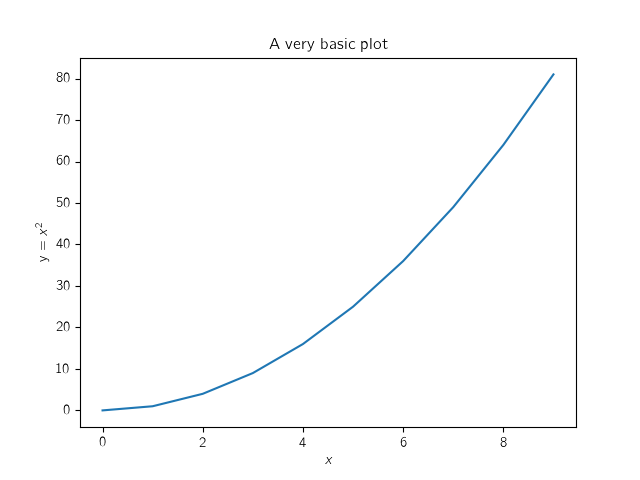

In [7]:
plt.plot(np.arange(10)**2)
plt.ylabel('y = $x^2$')
plt.xlabel('$x$')
plt.title('A very basic plot')
plt.savefig('basic-plot.pdf',format='pdf',dpi=600)

## Extensive constants library
More details found on the scipy [website](https://docs.scipy.org/doc/scipy-0.18.1/reference/constants.html)

In [8]:
# Definition of some constants and conversion factors.
from scipy.constants import codata
e = codata.value('atomic unit of charge')
k = codata.value("Boltzmann constant")
au2angs = codata.value('atomic unit of length')*1e10
const = (e**2)/k
k_B_eV = codata.value('Boltzmann constant in eV/K')